In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import math

In [ ]:
#데이터 불러오기
train = pd.read_csv('basketball_train.csv')
test = pd.read_csv('basketball_test.csv')


In [5]:
train

,Unnamed: 0,Player,Pos,3P,TRB,BLK
0,26,Wayne Ellington,SG,2.4,2.1,0.1
1,86,Nik Stauskas,SG,1.7,2.8,0.4
2,60,Alex Len,C,0.0,6.6,1.3
3,45,Buddy Hield,SG,1.8,3.3,0.1
4,68,Jodie Meeks,SG,1.6,2.1,0.1
...,...,...,...,...,...,...
75,82,J.R. Smith,SG,2.3,2.8,0.3
76,5,Nicolas Batum,SG,1.8,6.2,0.4
77,40,Montrezl Harrell,C,0.0,3.8,0.7
78,22,Troy Daniels,SG,2.1,1.5,0.1


In [6]:
test

,Unnamed: 0,Player,Pos,3P,TRB,BLK
0,96,Dwyane Wade,SG,0.8,4.5,0.7
1,39,Tim Hardaway,SG,1.9,2.8,0.2
2,21,Jordan Crawford,SG,1.9,1.8,0.1
3,95,Nikola Vucevic,C,0.3,10.4,1.0
4,56,Kyle Korver,SG,2.4,2.8,0.3
5,80,Iman Shumpert,SG,1.2,2.9,0.4
6,76,J.J. Redick,SG,2.6,2.2,0.2
7,78,Josh Richardson,SG,1.4,3.2,0.7
8,62,Robin Lopez,C,0.0,6.4,1.4
9,87,Edy Tavares,C,0.0,5.5,3.0


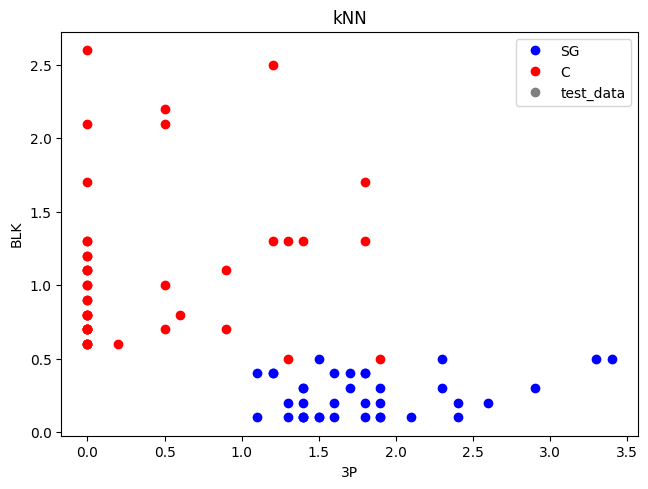

In [ ]:
#특징 선택, 데이터 준비
x_train = train[['3P', 'BLK']]
y_train = train[['Pos']]
x_test = test[['3P', 'BLK']]
y_test = test[['Pos']]

#시각화
def plot_knn(feature, label, test_feature):
    plt.title('kNN')
    plt.plot(feature[label=="SG"]["3P"], feature[label == "SG"]["BLK"], 'o', c = "blue",
             label = "SG")
    plt.plot(feature[label=="C"]["3P"], feature[label == "C"]["BLK"], 'o', c = "red",
             label = "C")
    plt.plot(feature[label==":"]["3P"], feature[label == ":"]["BLK"], 'o', c = "gray",
             label = "test_data")
    plt.tight_layout()
    plt.xlabel("3P")
    plt.ylabel("BLK")
    plt.legend()
    plt.show()
    
plot_knn(x_train, y_train.values.ravel(), x_test)

In [9]:
#모델 구성
kNN = KNeighborsClassifier(n_neighbors=1)

#학습 진행
kNN.fit(x_train, y_train.values.ravel())

#성능 평가
y_pred_1 = kNN.predict(x_test)
accuracy_score(y_test, y_pred_1)

0.8

In [11]:
#k값 찾기
max_val=0
mak_k=0
for i in range(1, 10, 2):
    kNN = KNeighborsClassifier(n_neighbors=i)
    kNN.fit(x_train, y_train.values.ravel())
    y_pred = kNN.predict(x_test)
    if max_val < accuracy_score(y_test, y_pred):
        max_val = accuracy_score(y_test, y_pred)
        max_k=i

print(max_k)
print(max_val)

3
0.9


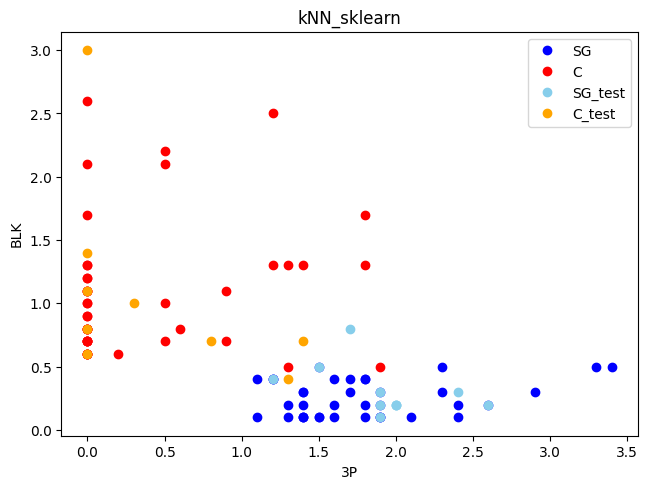

In [15]:
#모델 동작 시각화
def plot_knn_test(tr_feature, tr_label, te_feature, te_label):
    plt.title('kNN_sklearn')
    plt.plot(tr_feature[tr_label == "SG"]["3P"], tr_feature[tr_label == "SG"]["BLK"], 'o', c= "blue", label = "SG")
    plt.plot(tr_feature[tr_label == "C"]["3P"], tr_feature[tr_label == "C"]["BLK"], 'o', c= "red", label = "C")
    plt.plot(te_feature[te_label == "SG"]["3P"], te_feature[te_label == "SG"]["BLK"], 'o', c= "skyblue", label = "SG_test")
    plt.plot(te_feature[te_label == "C"]["3P"], te_feature[te_label == "C"]["BLK"], 'o', c= "orange", label = "C_test")
    plt.tight_layout()
    plt.xlabel("3P")
    plt.ylabel("BLK")
    plt.legend()
    plt.show()
    
plot_knn_test(x_train, y_train.values.ravel(), x_test, y_pred_1)
    